# CUNEF Colegio Universitario de Estudios Financieros

### Máster en Data Science para Finanzas

#### *Extracción, Transformación y Carga - ETL (2020/2021)*

#### Examen Final 

#### 1 de febrero de 2021

Ignacio Ruiz de Zuazu Echevarría

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import re
import pandas as pd
import matplotlib.pyplot as plt

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Pregunta 1: Inicializar y cargar el contexto spark

En primer lugar se importa el contexto y tras ello se inicializa:

In [2]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

Carga de los ficheros de los datos

In [3]:
data1 = "BDpracticafinalCSV.csv"

Carga del fichero en excel

In [4]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BDpracticafinal2021.xlsx to BDpracticafinal2021 (1).xlsx


In [6]:
import io
df = pd.read_excel(io.BytesIO(uploaded['BDpracticafinal2021.xlsx']))
df 

,Order,MS Zoning,Lot Frontage,Lot Area,Land Contour,Land Slope,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Exter Qual,Bsmt Cond,Total Bsmt SF,Heating QC,Central Air,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Garage Cars,Garage Area,Garage Cond,Pool Area,Pool QC,Mo Sold,Yr Sold,SalePrice
0,1,RL,141.0,31770,Lvl,Gtl,6,1960,1960,Stone,TA,Gd,1080,Fa,Y,1,0,3,1,TA,7,2.0,528.0,TA,0,Sp,5,2010,215000
1,2,RH,80.0,11622,Lvl,Gtl,5,1961,1961,None,TA,TA,882,TA,Y,1,0,2,1,TA,5,1.0,730.0,TA,0,Sp,6,2010,105000
2,3,RL,81.0,14267,Lvl,Gtl,6,1958,1958,BrkFace,TA,TA,1329,TA,Y,1,1,3,1,Gd,6,1.0,312.0,TA,0,Sp,6,2010,172000
3,4,RL,93.0,11160,Lvl,Gtl,7,1968,1968,None,Gd,TA,2110,Ex,Y,2,1,3,1,Ex,8,2.0,522.0,TA,0,Sp,4,2010,244000
4,5,RL,74.0,13830,Lvl,Gtl,5,1997,1998,None,TA,TA,928,Gd,Y,2,1,3,1,TA,6,2.0,482.0,TA,0,Sp,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,2930,RL,74.0,9627,Lvl,Mod,7,1993,1994,BrkFace,TA,TA,996,Ex,Y,2,1,3,1,TA,9,3.0,650.0,TA,0,Sp,11,2006,188000
2932,2898,Rl,NaN,11170,Lvl,Gtl,7,1990,1991,None,TA,TA,1216,Ex,Y,2,1,4,1,TA,8,2.0,693.0,TA,0,Sp,4,2006,250000
2933,2899,Rl,NaN,8098,Lvl,Gtl,6,2000,2000,None,Gd,TA,1381,Ex,Y,2,0,2,1,Gd,5,2.0,470.0,TA,0,Sp,10,2006,202000
2934,2900,Rl,85.0,14331,Lvl,Gtl,8,2002,2002,BrkFace,Gd,TA,1800,Ex,Y,2,0,3,1,Gd,7,3.0,765.0,TA,0,Sp,5,2006,312500


Una vez hecho esto se comienza el parseado:

In [7]:
raw_data1 = sc.textFile(data1)

Se comprueba cuántos registros se han cargado:

In [8]:
raw_data1.count()

2937

Se observan los datos:

In [9]:
raw_data1.take(5)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000']

Los datos vienen separados por ";". Se procede al parseado. Antes también se extraerá el nombre de cada variable.

In [10]:
data_header = raw_data1.take(1)[0]
raw_data1 = raw_data1.filter(lambda x: x != data_header)

In [11]:
data_vivienda = raw_data1.map(lambda x: x.split(";"))

In [12]:
data_vivienda.take(1)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000']]

In [13]:
data_header

'Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice'

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales (alta, media y baja densidad)

In [14]:
data_vivienda = data_vivienda.filter(lambda x: x[1] in ['RH','RL','RM'])
data_vivienda_distinct = data_vivienda.map(lambda x: x[1]).distinct().count()
data_vivienda_distinct

3

## Pregunta 2: Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

En primer lugar contamos las filas del dataset

In [15]:
data_vivienda.count()

2760

Contamos los valores únicos

In [16]:
data_vivienda.map(lambda x: x[0]).distinct().count()

2758

Se repiten 2 valores

In [18]:
viviendas_repetidas = data_vivienda.map(lambda x: (x[0],1))
viviendas_repetidas = viviendas_repetidas.reduceByKey(lambda x,y: x+y)
viviendas_repetidas = viviendas_repetidas.map(lambda x: (x[0], int(x[1])))
viviendas_repetidas.takeOrdered(2, lambda x: -x[1])

[('2930', 2), ('2929', 2)]

La vivienda 2930 y la vivienda 2929 son las que se repiten. Para eliminarlas una opción podría ser convertir el rdd en dataframe y mediante dropDuplicates.

## Pregunta 3:¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Total de inmuebles

In [19]:
data_vivienda.map(lambda x: x[0]).distinct().count()

2758

El número total de inmuebles es de 2758.

Miramos el índice de las variables que nos interesan

In [125]:
data_header_1 = data_header.split(';')

In [ ]:
print(data_header_1.index('MS Zoning'))
print(data_header_1.index('SalePrice'))

1
28


Seleccionamos la variable de zona y el precio de venta. Después realizamos el reducebykey por zona y calculamos la media de precio de venta en cada zona.

In [138]:
sales_mszone = data_vivienda.map(lambda x: (x[1], (float(x[28]),1)))
sales_mszone_groupby = sales_mszone.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1]))
sales_mszone_media = sales_mszone_groupby.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
sales_mszone_media.collect()

[('RL', 191131.81), ('RH', 136419.78), ('RM', 126781.39)]

En las zonas de baja densidad, la media del precio de venta es más alta que en el resto de zonas siendo la zona de media densidad la que tenga inmuebles más baratos.

## Pregunta 4: Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built

In [126]:
print(data_header_1.index('Year Built'))
print(data_header_1.index('Total Bsmt SF'))

7
12


Analizamos el caso más antigüo así como el año más reciente para saber el rango de años que se están manejando.

In [127]:
años_distintos = data_vivienda.map(lambda x: int(x[7])).distinct().collect()
años_distintos_minimo = min(años_distintos)
print("El año mínimo es",format(años_distintos_minimo))
años_distintos_maximo = max(años_distintos)
print("El año máximo es",format(años_distintos_maximo))

El año mínimo es 1872
El año máximo es 2010


Los primeros tres dígitos del año contiene información acerca de la década en la que se puede situar la superficie del sótano en metros cuadrados. Otra opción que se barajó fue la de emplear una función que sustituyese los años por los nombres de las décadas pero finalmente se ha optado por emplear este método. La conversión a metros cuadrados es de 1 pie = 0.092903 metros.

In [ ]:
def intervalos(x):
  
    if x <= 1880:
      return ('decada 1870-1880')
    elif x <= 1890:
      return ('decada 1880-1890')
    elif x <= 1900:
      return ('decada 1890-1900')      
    elif x <= 1910:
      return ('decada 1900-1910')
    elif x <= 1920:
      return ('decada 1910-1920')
    elif x <= 1930:
      return ('decada 1920-1930')
    elif x <= 1940:
      return ('decada 1930-1940')
    elif x <= 1950:
      return ('decada 1940-1950')
    elif x <= 1960:
      return ('decada 1950-1960')
    elif x <= 1970:
      return ('decada 1960-1970')
    elif x <= 1980:
      return ('decada 1970-1980')
    elif x <= 1990:
      return ('decada 1980-1990')
    elif x <= 2000:
      return ('decada 1990-2000')
    else:
      return ('decada 2000-2010')

In [32]:
total_bsmt_year = data_vivienda.map(lambda x: ((x[7])[0:3], (int(x[28])*0.092903,1)))
total_bsmt_year = total_bsmt_year.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1]))
total_bsmt_year = total_bsmt_year.map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
total_bsmt_year.takeOrdered(25, lambda x: -x[1])

[('201', 27008.39),
 ('200', 23519.95),
 ('199', 20823.31),
 ('198', 17386.1),
 ('189', 16888.22),
 ('188', 15375.2),
 ('197', 14115.1),
 ('196', 14064.94),
 ('193', 13284.73),
 ('195', 13077.89),
 ('187', 12418.03),
 ('191', 12028.45),
 ('190', 11730.42),
 ('194', 11716.04),
 ('192', 11486.9)]

La década del 2010 es la que registra la media más alta de superfície más grande en metros cuadrados de los sótanos mientras que en los 20 la media es la más baja.

¿Cuál es la década de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

In [ ]:
print(data_header_1.index('Year Built'))
print(data_header_1.index('Heating QC'))

7
13


Se extraen las columnas necesarias. Para la columna del año, al igual que en la pregunta anterior, se extraen los tres primeros valores o dígitos ya que contienen la información necesaria para separar los datos por décadas. Después filtramos la variable del acondicionamiento para aquellas que tengan un valor excelente y finalmente realizamos un countbykey para ver cuantas veces se repite ese valor en la década.

In [31]:
pruebafrio = data_vivienda.map(lambda x: ((x[7])[0:3], (x[13])))
pruebafrio = pruebafrio.filter(lambda x: x[1] in 'Ex')
pruebafrio.countByKey()

defaultdict(int,
            {'188': 2,
             '189': 4,
             '190': 12,
             '191': 38,
             '192': 51,
             '193': 40,
             '194': 56,
             '195': 98,
             '196': 88,
             '197': 68,
             '198': 28,
             '199': 233,
             '200': 635,
             '201': 2})

Se ve que en la década del 2000 se registra un mayor número de excelentes en cuanto a la calidad de las vivendas acondicionadas para el frío. La peor década se situaría entre la del 2010 y 1880.

## Pregunta 5:¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

In [ ]:
print(data_header_1.index('Year Built'))
print(data_header_1.index('Lot Area'))
print(data_header_1.index('SalePrice'))

7
3
28


Extraemos los datos necesarios en este apartado

Convertimos los square feet en metros cuadrados (1 pie cuadrado = 0.092903 metros cuadrados).

In [22]:
viviendas_caras_2009 = data_vivienda.map(lambda x: (x[0],x[7], round(float(x[3])*0.092903,2), int(x[28])))
viviendas_caras_2009.take(5)

[('1', '1960', 2951.53, 215000),
 ('2', '1961', 1079.72, 105000),
 ('3', '1958', 1325.45, 172000),
 ('4', '1968', 1036.8, 244000),
 ('5', '1997', 1284.85, 189900)]

Realizamos el cálulo del precio por metro cuadrado, es decir, el precio de cada metro cuadrado y realizamos un filtro en el año para que aparezcan las vivendas del año 2009. Finalmente ordenamos por precio de más alto a más bajo y vemos que la vivienda 568 es la que sale más cara el metro cuadrado.

In [141]:
prueba = viviendas_caras_2009.map(lambda x: (x[0], x[1], round(x[3]/x[2],2)))
prueba2 = prueba.filter(lambda x: x[1] in '2009')
prueba2.takeOrdered(10, lambda x: -x[2])

[('45', '2009', 509.62),
 ('39', '2009', 418.72),
 ('46', '2009', 378.45),
 ('431', '2009', 354.86),
 ('428', '2009', 347.58),
 ('819', '2009', 318.26),
 ('37', '2009', 314.9),
 ('447', '2009', 263.06),
 ('40', '2009', 243.09),
 ('319', '2009', 241.68)]

## Pregunta 6: Media anual por zonas del precio de venta y metros cuadrados.

In [ ]:
print(data_header_1.index('Yr Sold'))
print(data_header_1.index('Lot Area'))
print(data_header_1.index('SalePrice'))
print(data_header_1.index('MS Zoning'))

27
3
28
1


En este ejercicio se va a evaluar por separado la media anual del precio de venta y de los metros cuadrados por separado para cada zona. Se ha empleado en este ejercicio para hacer la media anual, el año en el que el inmueble fue vendido.

### PARA RH

#### Media de metros cuadrados (en pies)

In [142]:
media_anual_RH2 = data_vivienda.filter(lambda x: x[1] in 'RH')
media_anual_RH3 = media_anual_RH2.map(lambda x: (x[27], (float(x[3])*0.092903, 1)))
media_anual_RH3 = media_anual_RH3.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_anual_RH3.takeOrdered(5, lambda x: -x[1])

[('2008', 766.14),
 ('2010', 753.03),
 ('2006', 659.56),
 ('2007', 651.32),
 ('2009', 647.14)]

En 2008 la media de metros cuadrados fue más alta en zonas de alta densidad.

#### Media precio

In [143]:
media_RH_precio = data_vivienda.filter(lambda x: x[1] in 'RH')
media_RH_precio = media_RH_precio.map(lambda x: (x[27], (float(x[28]), 1)))
media_RH_precio = media_RH_precio.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_RH_precio.takeOrdered(5, lambda x: -x[1])

[('2008', 150333.33),
 ('2007', 147250.0),
 ('2006', 140316.67),
 ('2010', 126280.0),
 ('2009', 116206.8)]

En 2008 la media del precio de venta fue superior para zonas de alta densidad.

### PARA RM

#### Media de metros cuadrados (en pies)

In [144]:
media_rm_pies = data_vivienda.filter(lambda x: x[1] in 'RM')
media_rm_pies = media_rm_pies.map(lambda x: (x[27], (float(x[3])*0.092903, 1)))
media_rm_pies = media_rm_pies.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_rm_pies.takeOrdered(5, lambda x: -x[1])

[('2007', 625.45),
 ('2008', 623.67),
 ('2010', 586.1),
 ('2006', 575.01),
 ('2009', 552.56)]

En 2007 la media de metros cuadrados fue ligeramente superior al 2008 en zonas de media densidad.

#### Media precio

In [145]:
media_RM_precio = data_vivienda.filter(lambda x: x[1] in 'RM')
media_RM_precio = media_RM_precio.map(lambda x: (x[27], (float(x[28]), 1)))
media_RM_precio = media_RM_precio.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_RM_precio.takeOrdered(5, lambda x: -x[1])

[('2008', 133336.12),
 ('2007', 128947.62),
 ('2006', 127502.64),
 ('2010', 119681.71),
 ('2009', 118759.87)]

En 2008 el precio medio de venta en zonas de densidad media fue superior al resto al igual que también ocurría con el precio de venta en las zonas de alta densidad.

### PARA RL

#### Media de metros cuadrados (en pies)

In [146]:
media_rl_pies = data_vivienda.filter(lambda x: x[1] in 'RL')
media_rl_pies = media_rl_pies.map(lambda x: (x[27], (float(x[3])*0.092903, 1)))
media_rl_pies = media_rl_pies.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_rl_pies.takeOrdered(5, lambda x: -x[1])

[('2007', 1059.68),
 ('2008', 1047.65),
 ('2006', 1042.81),
 ('2010', 1011.36),
 ('2009', 1002.18)]

En 2007 la media fue ligeramente superior al resto al igual que ocurría con las zonas de baja densidad. Cabe destacar que la superfície en estas zonas es más grande que el resto de zonas.

#### Media precio

In [147]:
media_RL_precio = data_vivienda.filter(lambda x: x[1] in 'RL')
media_RL_precio = media_RL_precio.map(lambda x: (x[27], (float(x[28]), 1)))
media_RL_precio = media_RL_precio.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1],2)))
media_RL_precio.takeOrdered(5, lambda x: -x[1])

[('2006', 193654.15),
 ('2007', 193399.98),
 ('2009', 190455.55),
 ('2008', 189885.59),
 ('2010', 184978.42)]

La media más alta del precio en estas zonas se situa en 2006 a diferencia de las otras dos (2008) y destacar que el precio de este tipo de viviendas es más alto que en el resto de zonas.

## Pregunta 7: ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

In [ ]:
print(data_header_1.index('Mas Vnr Type'))
print(data_header_1.index('SalePrice'))

9
28


En este ejercicio se han usado las variables del precio de venta y de los materiales y se ha realizado una suma total de todas las cantidades. En el caso de los materiales de ladrillo, se ha realizado en primer lugar, un cálculo por separado de sus totales y finalmente uno con ambos tipos de ladrillo. En cada apartado primero se ha filtrado la columna correspondiente al material por el material que queramos estudiar y después se ha realizado la suma total de las cantidades que corresponden a ese material.

CASAS DE PIEDRA

In [134]:
piedra_precio1 = data_vivienda.filter(lambda x: x[9] in 'Stone')
piedra_precio = piedra_precio1.map(lambda x: int(x[28])).sum()
piedra_precio

63687135

63,687,135 recaudados

CASAS DE LADRILLO

In [133]:
ladrillonormal_precio = data_vivienda.filter(lambda x: x[9] in ['BrkCmn'])
ladrillonormal_precio = ladrillonormal_precio.map(lambda x: int(x[28])).sum()
ladrillonormal_precio

3504975

In [131]:
ladrillovisto_precio = data_vivienda.filter(lambda x: x[9] in ['BrkFace'])
ladrillovisto_precio = ladrillovisto_precio.map(lambda x: int(x[28])).sum()
ladrillovisto_precio

178788061

In [132]:
ladrillostotales_precio = data_vivienda.filter(lambda x: x[9] in ['BrkCmn','BrkFace'])
ladrillostotales_precio = ladrillostotales_precio.map(lambda x: int(x[28])).sum()
ladrillostotales_precio

182293036

182,293,036 recaudados.

Existe una diferencia significativa entre los dos materiales en cuanto a la cantidad de dinero recaudado por las ventas a pesar de que existen dos tipos de ladrillos siendo el ladrillo visto el tipo de ladrillo que más recauda con una amplia diferencia respecto al ladrillo normal.

## Pregunta 8:¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

In [ ]:
print(data_header_1.index('Kitchen AbvGr'))
print(data_header_1.index('Garage Cars'))
print(data_header_1.index('SalePrice'))

18
21
28


Media precio de venta en viviendas de 2 cocinas y 2 o más plazas de garajes.

In [130]:
cocina_sin_nulos = data_vivienda.filter(lambda x: x[18] is not '')
garaje_sin_nulos = cocina_sin_nulos.filter(lambda x: x[21] is not '')
cocina_garaje_2 = garaje_sin_nulos.map(lambda x: (int(x[18]), int(x[21]), float(x[28])))
cocina_garaje_2 = cocina_garaje_2.filter(lambda x: x[0] == 2)
cocina_garaje_2 = cocina_garaje_2.filter(lambda x: x[1] >= 2)
cocina_garaje_2 = cocina_garaje_2.map(lambda x: x[2])
print('La media es de', format(round(cocina_garaje_2.mean(),2)))

La media es de 145124.28


In [ ]:
import numpy as np

Cuartiles

In [ ]:
print("El cuartil inferior es",format(np.quantile(cocina_garaje_2.collect(), 0.25)))
print("La mediana es",format(np.quantile(cocina_garaje_2.collect(), 0.5)))
print("El cuartil superior es",format(np.quantile(cocina_garaje_2.collect(), 0.75)))

El cuartil inferior es 118973.0
La mediana es 141800.0
El cuartil superior es 158500.0


Media precio de venta en viviendas de 1 cocina y 1 plaza de garaje.

In [129]:
cocina_sin_nulos = data_vivienda.filter(lambda x: x[18] is not '')
garaje_sin_nulos = cocina_sin_nulos.filter(lambda x: x[21] is not '')
cocina_garaje_1 = garaje_sin_nulos.map(lambda x: (int(x[18]), int(x[21]), float(x[28])))
cocina_garaje_1 = cocina_garaje_1.filter(lambda x: x[0] == 1)
cocina_garaje_1 = cocina_garaje_1.filter(lambda x: x[1] == 1)
cocina_garaje_1 = cocina_garaje_1.map(lambda x: x[2])
print('La media es de', format(round(cocina_garaje_1.mean(),2)))

La media es de 128121.99


Cuartiles

In [ ]:
print("El cuartil inferior es",format(np.quantile(cocina_garaje_1.collect(), 0.25)))
print("La mediana es",format(np.quantile(cocina_garaje_1.collect(), 0.5)))
print("El cuartil superior es",format(np.quantile(cocina_garaje_1.collect(), 0.75)))

El cuartil inferior es 111625.0
La mediana es 128000.0
El cuartil superior es 142062.5


En cuanto a la media, el precio es superior en las viviendas con 2 cocinas y 2 garajes o más, y en terminos de cuartiles, el primer cuartil o cuartil inferior es al que más se asemejan los dos tipos de vivienda pero en la mediana y el cuartil superior el precio de las viviendas con 2 cocinas y 2 o más garajes.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Para este ejercicio se han empleado funciones de spark-SQL para, en primer lugar y después de hacer una conversión a tipo numérico de las dos variables, realizar una matriz de correlaciones y representarlo gráficamente en una gráfica de dispersión. 

In [ ]:
print(data_header_1.index('SalePrice'))
print(data_header_1.index('Garage Cars'))

28
21


In [ ]:
import pyspark.sql.functions as f

In [ ]:
data_vivienda_sql = spark.read.csv("BDpracticafinalCSV.csv", sep=';', header=True)
data_vivienda_sql = data_vivienda_sql.select('Garage Cars', 'SalePrice')
data_vivienda_sql.show()

In [ ]:
data_vivienda_sql = data_vivienda_sql.select('Garage Cars', 'SalePrice')
data_vivienda_sql = data_vivienda_sql.na.drop("all")
data_vivienda_sql = data_vivienda_sql.withColumn("Garage Cars", data_vivienda_sql["Garage Cars"].cast("int"))
data_vivienda_sql = data_vivienda_sql.withColumn("SalePrice", data_vivienda_sql["SalePrice"].cast("int"))
data_vivienda_sql.show(10)

+-----------+---------+
|Garage Cars|SalePrice|
+-----------+---------+
|          2|   215000|
|          1|   105000|
|          1|   172000|
|          2|   244000|
|          2|   189900|
|          2|   195500|
|          2|   213500|
|          2|   191500|
|          2|   236500|
|          2|   189000|
+-----------+---------+
only showing top 10 rows



In [ ]:
correlacion = data_vivienda_sql.stat.corr("Garage Cars","SalePrice")
correlacion

0.6479583634978916

In [ ]:
tablas_en_panda = data_vivienda_sql.toPandas()

In [ ]:
tablas_en_panda.corr()

,Garage Cars,SalePrice
Garage Cars,1.000000,0.648272
SalePrice,0.648272,1.000000


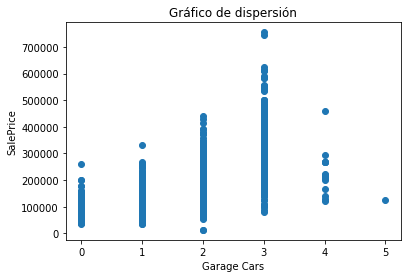

In [ ]:
plt.scatter(tablas_en_panda['Garage Cars'], tablas_en_panda['SalePrice'])
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice')
plt.title('Gráfico de dispersión')
plt.show()

Hay una correlación positiva entre las dos variables, por lo que el aumento en capacidad de garaje es propenso a que el precio de la vivienda suba.

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

In [ ]:
print(data_header_1.index('SalePrice'))
print(data_header_1.index('Exter Qual'))
print(data_header_1.index('Bsmt Cond'))
print(data_header_1.index('Heating QC'))
print(data_header_1.index('Kitchen Qual'))
print(data_header_1.index('Garage Cond'))
print(data_header_1.index('Pool QC'))

28
10
11
13
19
23
25


En primer lugar se tratará de averiguar que variables correspondientes a la calidad de una parte de una vivienda tiene el valor suficientes de excelentes que representan el mejor servicio posible para esa variable. Para ello filtraremos por el valor 'Ex' y procederemos a contar los valores de cada uno por separado.

In [23]:
vivienda_servicios_excel = data_vivienda.filter(lambda x: x[10] in 'Ex')
vivienda_servicios_excel = vivienda_servicios_excel.map(lambda x: (x[0], x[10], int(x[28])))
print(vivienda_servicios_excel.take(5))
print('El número de valores totales es de', format(vivienda_servicios_excel.count()))

[('16', 'Ex', 538000), ('37', 'Ex', 376162), ('39', 'Ex', 395192), ('45', 'Ex', 611657), ('47', 'Ex', 500000)]
El número de valores totales es de 102


In [24]:
vivienda_bsm_excel = data_vivienda.filter(lambda x: x[11] in 'Ex')
vivienda_bsm_excel = vivienda_bsm_excel .map(lambda x: (x[0], x[11], int(x[28])))
print(vivienda_bsm_excel.take(5))
print('El número de valores totales es de', format(vivienda_bsm_excel.count()))

[('1184', 'Ex', 290000), ('1491', 'Ex', 135000), ('2137', 'Ex', 160000)]
El número de valores totales es de 3


In [25]:
vivienda_heating_excel = data_vivienda.filter(lambda x: x[13] in 'Ex')
vivienda_heating_excel = vivienda_heating_excel.map(lambda x: (x[0], x[13], int(x[28])))
print(vivienda_heating_excel.take(5))
print('El número de valores totales es de', format(vivienda_heating_excel.count()))

[('4', 'Ex', 244000), ('6', 'Ex', 195500), ('7', 'Ex', 213500), ('8', 'Ex', 191500), ('9', 'Ex', 236500)]
El número de valores totales es de 1355


In [83]:
vivienda_kitchen_excel = data_vivienda.filter(lambda x: x[19] in 'Ex')
vivienda_kitchen_excel = vivienda_kitchen_excel.map(lambda x: (x[0], x[19], int(x[28])))
print(vivienda_kitchen_excel.take(5))
print('El número de valores totales es de', format(vivienda_kitchen_excel.count()))

[('4', 'Ex', 244000), ('16', 'Ex', 538000), ('18', 'Ex', 394432), ('37', 'Ex', 376162), ('39', 'Ex', 395192)]
192


In [26]:
garage_sin_nulos = data_vivienda.filter(lambda x: x[23] is not '')
vivienda_garage_excel = garage_sin_nulos.filter(lambda x: x[23] in 'Ex')
vivienda_garage_excel = vivienda_garage_excel.map(lambda x: (x[0], x[23], int(x[28])))
print(vivienda_garage_excel.take(5))
print('El número de valores totales es de', format(vivienda_garage_excel.count()))

[('602', 'Ex', 127500), ('1549', 'Ex', 120500), ('2143', 'Ex', 127000)]
El número de valores totales es de 3


In [27]:
vivienda_pool_excel = data_vivienda.filter(lambda x: x[25] in 'Ex')
vivienda_pool_excel = vivienda_pool_excel.map(lambda x: (x[0], x[25], int(x[28])))
print(vivienda_pool_excel.take(5))
print('El número de valores totales es de', format(vivienda_pool_excel.count()))

[('1064', 'Ex', 615000), ('1761', 'Ex', 745000), ('2231', 'Ex', 315000), ('2571', 'Ex', 235000)]
El número de valores totales es de 4


Hay variables que tratan sobre la calidad de servicios en algunas características de la vivienda que no resultan importantes para elegir a las 10 mejores vivendas ya que son muy pocas las viviendas con valor excelente en características como el estado de la piscina, la calidad del garaje y la calidad del sótano. A continuación se tratará de juntar el resto de variables con el índice para evaluar si existen 10 viviendas que contengan excelente en todas las características.

In [106]:
vivienda_precio = data_vivienda.filter(lambda x: x[13] in 'Ex')
vivienda_precio = vivienda_precio.filter(lambda x: x[19] in 'Ex')
vivienda_precio = vivienda_precio.filter(lambda x: x[10] in 'Ex')
vivienda_precio.count()

88

In [108]:
vivienda_precio_calidad = vivienda_precio.map(lambda x: (x[0], x[13], x[19], x[10], int(x[28])))
vivienda_precio_calidad.take(5)

[('16', 'Ex', 'Ex', 'Ex', 538000),
 ('37', 'Ex', 'Ex', 'Ex', 376162),
 ('39', 'Ex', 'Ex', 'Ex', 395192),
 ('45', 'Ex', 'Ex', 'Ex', 611657),
 ('47', 'Ex', 'Ex', 'Ex', 500000)]

In [110]:
vivienda_precio_calidad.takeOrdered(10, lambda x: x[4])

[('1499', 'Ex', 'Ex', 'Ex', 160000),
 ('2181', 'Ex', 'Ex', 'Ex', 183850),
 ('2182', 'Ex', 'Ex', 'Ex', 184750),
 ('945', 'Ex', 'Ex', 'Ex', 230000),
 ('460', 'Ex', 'Ex', 'Ex', 248500),
 ('427', 'Ex', 'Ex', 'Ex', 253293),
 ('1074', 'Ex', 'Ex', 'Ex', 266000),
 ('1073', 'Ex', 'Ex', 'Ex', 274000),
 ('1724', 'Ex', 'Ex', 'Ex', 277500),
 ('1723', 'Ex', 'Ex', 'Ex', 280000)]

Las vivendas que tienen un mejor precio según los servicios prestados son las viviendas que se encuentran en los resultados de arriba entendiendo como criterios los sigueintes: la calidad del revestimiento, calidad de la calefacción y la calidad de la cocina. El resto de categorías de calidad no contenían un número suficiente de excelentes.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta